<a href="https://colab.research.google.com/github/oscarjose9423/Modelling/blob/main/Modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1> Modelado  </h1>

Este documento hace parte de la presentación de los modelos empleados para el desarrollo del proyecto de innovación agrícola y pecuaria. Se plantea la metodología empleada por mi para el desarrollo de los diferentes no solo para especies pecuarias como aves de corral, cerdos y ovejos si no también agricolas representativas de la región de ejecución del proyecto.

<p><a name="contents"></a></p>

# Contenido 

- <a href="#colabIntro">1. Modelo de producción acumulada sigmoide </a><br>
- <a href="#pythonIntro">2. Modelo de clasificación para especies de ovejo</a><br>


<p><a name="colabIntro"></a></p>

# 1)  Modelo de producción acumulada sigmoide

La limpieza de datos representa uno de los pasos esenciales en el desarrollo de modelos, ya que al contar con datos faltantes o elementos extraños los algortimos para la convergencia del modelo no trabajarán correctamentefrom google.colab import files
uploaded = files.upload()

In [4]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving Consolidado agrícola exp. a feb 2020.xlsx - Hoja1.csv to Consolidado agrícola exp. a feb 2020.xlsx - Hoja1.csv


* Lectura de archivos 


In [15]:
agricola = pd.read_csv(io.StringIO(uploaded['Consolidado agrícola exp. a feb 2020.xlsx - Hoja1.csv'].decode('utf-8')))
print(agricola.sample(10))

         FECHA   NOMBREPARTICIPANTE      CEDULA  ...        VEREDA ESPECIES     KG
302  20/1/2020        ISIDORO PEREZ    10166157  ...      VILLARAZ     MAIZ     48
44   19/8/2019    ALBA LUCIA PULIDO    40081962  ...     Santander     MAIZ    151
41   18/2/2020  JUDY MARCELA DUSSAN    40612658  ...     SANTANDER  AHUYAMA    1,8
295  20/1/2020         SALOMON DIAZ     4960451  ...      VILLARAZ     YUCA     62
117  19/8/2019           JAIRO AROS    79379798  ...     Santander     YUCA    371
27   15/5/2019    REINALDO CASANOVA    17624174  ...  La Esperenza     YUCA  132,8
359  15/7/2019         JORGE GARCIA     7727182  ...     La Arabia     YUCA   88,5
376   6/6/2019      SABARAIN DUARTE    96329995  ...    Guadualito  AHUYAMA   87,5
171  20/1/2020        ALFONSO LOPEZ  1083870570  ...  SANTANDER II     MAIZ    120
105  19/9/2019         GLADYS GUACA    26640820  ...     La Granja     YUCA     78

[10 rows x 8 columns]


* Importación de librerias necesarias para el desarrollo de modelos de aprendizaje automático:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from scipy import stats
from scipy.stats import skewtest, levene # NO FUNCIONA SI SE TIENE NA
from sklearn.datasets import load_iris # grafica de violines
from sklearn.impute import SimpleImputer# imputador para relleno de NaN
from sklearn.model_selection import train_test_split # uso de datos de entranmiento
from sklearn.model_selection import StratifiedShuffleSplit # division de datos de entranmiento cuando no se tiene relación entre los indices para x & y
from sklearn.preprocessing import OrdinalEncoder # codificación de variables categóricas multiclase
from sklearn.preprocessing import OneHotEncoder # codificación de variables categoricas binarias
from sklearn.preprocessing import MinMaxScaler # escalado de caracteristicas o normalización
from sklearn.preprocessing import StandardScaler # estandarización
from sklearn.preprocessing import PolynomialFeatures # para hacer conversion de variable regresora
                                                     # a exponencial, segun grado de polinomio
from sklearn.linear_model import ElasticNet # redes elastícas combinanción de ridge & laso
                                            # doble penalizaición de los pesos
from sklearn.pipeline import Pipeline # <<<< permite realizar varios procesos en una sola linea

''' ############ lIBRERIAS MODELADO ###############'''
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
''' ##### VALIDACION CRUZADA ######'''
from sklearn.model_selection import cross_val_score

from sklearn import metrics #METRICAS MSE RMSE MAE R2
import statsmodels.api as sm
from statsmodels.formula.api import ols # ORDINAL LINE SQUARE

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
agricola = agricola.sort_values(by = 'FECHA')
agricola.set_index('FECHA', inplace = True) #Importante Inplace para que realice cambios
agricola.reset_index(inplace = True)

* Se imprimen los tipos de variables para validar su correspodencia

In [ ]:
print(agricola.dtypes)

# CONVERSION A TIPO FECHA
agricola.FECHA = pd.to_datetime(agricola.FECHA)

# CONVERSION TIPO FLOTANTE KG
for i in range(len(agricola.KG)):
    agricola.KG[i] = agricola.KG[i].replace(",", "")
agricola.KG = agricola.KG.astype('float')

# VERIFIACIÓN
print(agricola.dtypes)

* Se validan los datos nulos y Not a Number (NaN)

In [ ]:
print(agricola.isnull().sum())
print('-'*23)
print(agricola.isna().sum())

* Datos para la elaboración del modelo

In [108]:
yuca = yuca.groupby('FECHA', as_index = False).KG.mean()

yuca['ACUMULADO'] = yuca.KG.cumsum()

yuca['TIEMPO'] = [i.timestamp() for i in yuca.FECHA]


x_data, y_data = (yuca["TIEMPO"].values, yuca["ACUMULADO"].values)


*  Gráfica

El análisis gráfico representa elementos valiosos, ya que se puede identificar el tipo de modelo a emplear

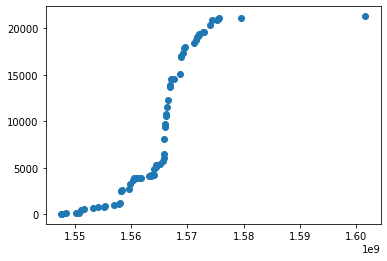

In [123]:
plt.scatter('TIEMPO', 'ACUMULADO', data = yuca)
plt.show()

* Normalización

In [109]:
# normalicemos los datos
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

* Modelo

In [110]:
from scipy.optimize import curve_fit

# construcción del modelo, función sigmoide
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

 beta_1 = 686.253808, beta_2 = 0.978013


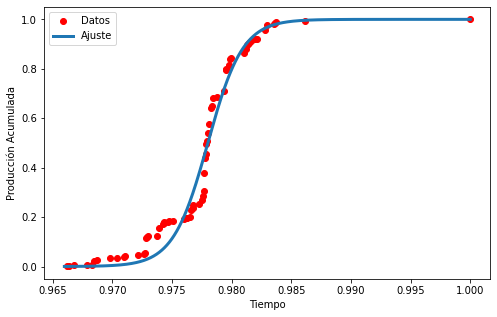

In [121]:
popt, pcov = curve_fit(sigmoid, xdata, ydata) # popt: parametros, pcov: covarianza
#imprimamos los parámetros
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1])) 

# Visualización del modelo
x = np.linspace(1527510400.0, 1581292800.0, 259200)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, popt[0], popt[1]) # modficados manualmente
plt.plot(xdata, ydata, 'ro', label='Datos')
plt.plot(x,y, linewidth=3.0, label='Ajuste')
plt.legend(loc='best')
plt.ylabel('Producción Acumulada')
plt.xlabel('Tiempo')
plt.show()

<p><a name="pythonIntro"></a></p>

# 2) Introducción a Python

[[Contenidos]](#contents)

El objetivo de la presente sección es el de suministrar al lector una breve introducción al lenguaje Python, y ayudar a los principiantes a familiarizarse con dicho lenguaje.